In [1]:
import main

# Source

Paper: https://paperswithcode.com/paper/automated-question-answer-medical-model-based

Source Code: https://github.com/abdoelsayed2016/Automated-Question-Answer-Medical-Model-based-on-Deep-Learning-Technology

# Prepare Dataset

In [2]:
!wget https://github.com/abdoelsayed2016/Automated-Question-Answer-Medical-Model-based-on-Deep-Learning-Technology/raw/master/data/q-a.txt -P /content/data

--2022-04-08 15:11:35--  https://github.com/abdoelsayed2016/Automated-Question-Answer-Medical-Model-based-on-Deep-Learning-Technology/raw/master/data/q-a.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/abdoelsayed2016/Automated-Question-Answer-Medical-Model-based-on-Deep-Learning-Technology/master/data/q-a.txt [following]
--2022-04-08 15:11:36--  https://raw.githubusercontent.com/abdoelsayed2016/Automated-Question-Answer-Medical-Model-based-on-Deep-Learning-Technology/master/data/q-a.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66627021 (64M) [text/plain]
Saving to: ‘/content/data/q-a

# LSTM

In [3]:
lstm = main.Main(embedding_size=300, hidden_size=300, rnnType='lstm', teacher_focing_ratio=0.5)

lstm.prepareDataset(filepath='/content/data/q-a.txt', q='q', a='a')

lstm.generateEncoder()
lstm.generateDecoder()

print(lstm.encoder, lstm.decoder)

Reading....
Read 166804 sentence pairs
Counted words: q- 2284	a - 2244
GRUEncoder(
  (embedding): Embedding(2284, 300)
  (lstm): LSTM(300, 300, batch_first=True)
) GRUDecoder(
  (embedding): Embedding(2244, 300)
  (lstm): LSTM(300, 300, batch_first=True)
  (out): Linear(in_features=300, out_features=2244, bias=True)
  (softmax): LogSoftmax(dim=1)
)


# GRU

In [4]:
gru = main.Main(embedding_size=300, hidden_size=300, rnnType='gru', teacher_focing_ratio=0.5)

gru.prepareDataset(filepath='/content/data/q-a.txt', q='q', a='a')

gru.generateEncoder()
gru.generateDecoder()

print(gru.encoder, gru.decoder)

Reading....
Read 166804 sentence pairs
Counted words: q- 2284	a - 2244
GRUEncoder(
  (embedding): Embedding(2284, 300)
  (gru): GRU(300, 300, batch_first=True)
) GRUDecoder(
  (embedding): Embedding(2244, 300)
  (gru): GRU(300, 300, batch_first=True)
  (out): Linear(in_features=300, out_features=2244, bias=True)
  (softmax): LogSoftmax(dim=1)
)


# Train

2m 48s (- 25m 15s) (10000 10%) 3.8819
5m 30s (- 22m 0s) (20000 20%) 3.6602
8m 17s (- 19m 21s) (30000 30%) 3.3470
11m 10s (- 16m 45s) (40000 40%) 2.5905
14m 7s (- 14m 7s) (50000 50%) 1.6230
17m 6s (- 11m 24s) (60000 60%) 0.8571
20m 6s (- 8m 37s) (70000 70%) 0.4218
23m 6s (- 5m 46s) (80000 80%) 0.2521
26m 5s (- 2m 53s) (90000 90%) 0.1985
29m 4s (- 0m 0s) (100000 100%) 0.1800


<Figure size 432x288 with 0 Axes>

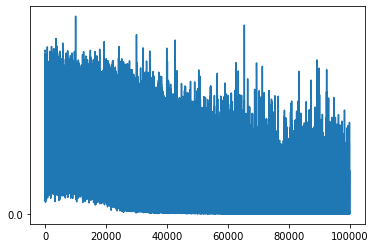

In [5]:
lstm.trainiters(n_iters=100000, print_every=10000, plot_every=10000, learning_rate=.005)

2m 45s (- 24m 50s) (10000 10%) 3.9108
5m 26s (- 21m 46s) (20000 20%) 3.5583
8m 12s (- 19m 10s) (30000 30%) 2.8123
11m 2s (- 16m 34s) (40000 40%) 1.8620
13m 55s (- 13m 55s) (50000 50%) 0.9550
16m 50s (- 11m 13s) (60000 60%) 0.4770
19m 46s (- 8m 28s) (70000 70%) 0.2592
22m 42s (- 5m 40s) (80000 80%) 0.1981
25m 39s (- 2m 51s) (90000 90%) 0.1681
28m 35s (- 0m 0s) (100000 100%) 0.1533


<Figure size 432x288 with 0 Axes>

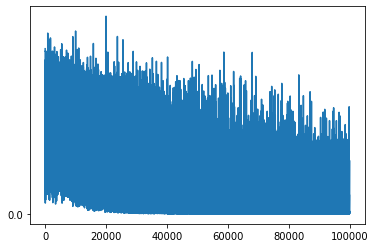

In [6]:
gru.trainiters(n_iters=100000, print_every=10000, plot_every=10000, learning_rate=.005)

# Evaluate

In [7]:
lstm.evaluateiters(lstm.pairs, random_seed=0)

Question: what s the best way to end man boobs fast ?
Answer: and surgery .
Predict Answer:and surgery .

Question: how can i make my gynecomastia go away ?
Answer: surgery is the only solution .
Predict Answer:surgery is the only solution .

Question: does sensa have asprin in it ?
Answer: no .
Predict Answer:no .

Question: can a new tumor on my arm cause lymphedema ?
Answer: it can certainly happen .
Predict Answer:it can certainly happen .

Question: what is a cardiac rehabilitation specialist ?
Answer: pm r physiatrist rehab physician .
Predict Answer:pm r physiatrist rehab physician .

Question: will the water diet work ?
Answer: no . not in any way .
Predict Answer:no . not in any way .

Question: what are sleep apnea doctors called ?
Answer: also neurologist do sleep evaluation .
Predict Answer:also neurologist do sleep evaluation .

Question: does tamoxifen drain your brain ?
Answer: no negative effect on brain .
Predict Answer:no negative effect on brain .

Question: is it po

In [8]:
gru.evaluateiters(gru.pairs, random_seed=0)

Question: what s the best way to end man boobs fast ?
Answer: and surgery .
Predict Answer:and surgery .

Question: how can i make my gynecomastia go away ?
Answer: surgery is the only solution .
Predict Answer:surgery is the only solution .

Question: does sensa have asprin in it ?
Answer: no .
Predict Answer:no .

Question: can a new tumor on my arm cause lymphedema ?
Answer: it can certainly happen .
Predict Answer:it can certainly happen .

Question: what is a cardiac rehabilitation specialist ?
Answer: pm r physiatrist rehab physician .
Predict Answer:pm r physiatrist rehab physician .

Question: will the water diet work ?
Answer: no . not in any way .
Predict Answer:no . not in any way .

Question: what are sleep apnea doctors called ?
Answer: also neurologist do sleep evaluation .
Predict Answer:also neurologist do sleep evaluation .

Question: does tamoxifen drain your brain ?
Answer: no negative effect on brain .
Predict Answer:no negative effect on brain .

Question: is it po